### Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import ast
from datetime import datetime

### Access the movies dataset here: https://www.kaggle.com/rounakbanik/the-movies-dataset

 ### Import data files and start exploring data at a high-level

In [2]:
#import credits csv files into dataframes
credits = pd.read_csv('credits.csv')

In [3]:
#see dataframe
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
#get info
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
#Drop any duplicates in credits based on id
credits = credits.drop_duplicates(subset=['id'])

In [6]:
#import movies csv file into dataframes
movies = pd.read_csv('movies_metadata.csv',low_memory=False)

In [7]:
#drop irrelevant columns: 'homepage','overview', 'original_title', 'imdb_id', 'spoken_languages', 
#'production_companies', 'production_countries','poster_path','popularity','tagline','video'
movies_dropped = movies.drop(columns = ['homepage','overview', 'original_title', 'spoken_languages',
                                        'production_companies', 'production_countries','imdb_id',
                                        'poster_path','popularity','tagline','video'])


In [8]:
movies_dropped.head()

,adult,belongs_to_collection,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [9]:
#Look at data info
movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
id                       45466 non-null object
original_language        45455 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
status                   45379 non-null object
title                    45460 non-null object
vote_average             45460 non-null float64
vote_count               45460 non-null float64
dtypes: float64(4), object(9)
memory usage: 4.5+ MB


In [10]:
#Drop any duplicates in movies_dropped based on id
movies_dropped = movies_dropped.drop_duplicates(subset=['id'])

### Fix errors in column types for 'budget' and 'id' columns

In [11]:
#Note that budget is not a numeric type. Convert budget to numeric.
movies_dropped['budget'] = pd.to_numeric(movies_dropped['budget'], errors='coerce')

#Note that id is also not a numeric type. Convert id to numeric
movies_dropped['id'] = pd.to_numeric(movies_dropped['id'], errors='coerce')

movies_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45436 entries, 0 to 45465
Data columns (total 13 columns):
adult                    45436 non-null object
belongs_to_collection    4491 non-null object
budget                   45433 non-null float64
genres                   45436 non-null object
id                       45433 non-null float64
original_language        45425 non-null object
release_date             45349 non-null object
revenue                  45430 non-null float64
runtime                  45173 non-null float64
status                   45349 non-null object
title                    45430 non-null object
vote_average             45430 non-null float64
vote_count               45430 non-null float64
dtypes: float64(6), object(7)
memory usage: 4.9+ MB


### Identify missing revenue and budget values as null and drop rows will null values in these columns

In [12]:
#Look at data statistics
#Note that many movies are showing a budget and revenue of 0. There are also movies with a runtime of 0.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,4.543300e+04,45433.000000,4.543000e+04,45173.00000,45430.000000,45430.000000
mean,4.224549e+06,108375.226179,1.121288e+07,94.12430,5.618329,109.935989
std,1.742799e+07,112479.760366,6.435213e+07,38.41554,1.924139,491.466335
min,0.000000e+00,2.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,0.000000e+00,26461.000000,0.000000e+00,85.00000,5.000000,3.000000
50%,0.000000e+00,59996.000000,0.000000e+00,95.00000,6.000000,10.000000
75%,0.000000e+00,157351.000000,0.000000e+00,107.00000,6.800000,34.000000
max,3.800000e+08,469172.000000,2.787965e+09,1256.00000,10.000000,14075.000000


In [13]:
#Number of movies with 0 revenue
movies_dropped[movies_dropped.revenue==0]['revenue'].count()

38032

In [14]:
#Number of movies with 0 budget
movies_dropped[movies_dropped.budget==0]['budget'].count()

36553

In [15]:
#Replace 0s in revenue and budget with null values
movies_dropped['revenue'] = movies_dropped['revenue'].replace(0,np.nan)
movies_dropped['budget'] = movies_dropped['budget'].replace(0,np.nan)

#Drop rows with null revenue and budget
movies_dropped = movies_dropped.dropna(subset=['revenue','budget'])

### Similarly, identify missing runtime, vote_average, and vote_count values (0) as null and drop from dataframe

In [16]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.runtime==0]['runtime'].count()

11

In [17]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_average==0]['vote_average'].count()

7

In [18]:
#Identify number of movies with runtime = 0
movies_dropped[movies_dropped.vote_count==0]['vote_average'].count()

7

In [19]:
#Set runtime=0,vote_average,vote_count values as null
movies_dropped['runtime'] = movies_dropped['runtime'].replace(0,np.nan)
movies_dropped['vote_average'] = movies_dropped['vote_average'].replace(0,np.nan)
movies_dropped['vote_count'] = movies_dropped['vote_count'].replace(0,np.nan)

In [20]:
#Drop rows with null runtime values
movies_dropped = movies_dropped.dropna(subset = ['runtime','vote_average','vote_count'])

In [21]:
#Check for null entries. 4135 null belongs_to_collection left, indicating the movies that don't belong to a 
#collection.
movies_dropped.isnull().sum()

adult                       0
belongs_to_collection    4135
budget                      0
genres                      0
id                          0
original_language           0
release_date                0
revenue                     0
runtime                     0
status                      0
title                       0
vote_average                0
vote_count                  0
dtype: int64

### If the movie belongs to a collection (i.e. franchise), extract the name of the collection and replace any null values with 0s to indicate no collection.

In [22]:
#Convert 'belongs_to_collection' column to dictionaries and Nans
movies_dropped.belongs_to_collection = movies_dropped.belongs_to_collection.apply(lambda x: ast.literal_eval(x) 
                                                                                  if type(x) != float else None)


In [23]:
#Extract collection name in new column, 0 if none
movies_dropped['collection'] = movies_dropped.belongs_to_collection.apply(lambda x: x['name'] 
                                                                          if type(x) == dict else 0)


In [24]:
#Drop original 'belongs_to_collection' column
movies_dropped = movies_dropped.drop(columns = ['belongs_to_collection'])

In [25]:
#Look at statistics for updated data
#Note that now movies seem to have a budget and revenue of single digits ($1) which seems unlikely.
movies_dropped.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.356000e+03,5356.000000,5.356000e+03,5356.000000,5356.000000,5356.000000
mean,3.119983e+07,60461.286221,9.069922e+07,110.047050,6.283943,735.556385
std,4.022028e+07,95592.121111,1.664321e+08,21.502907,0.896771,1253.526284
min,1.000000e+00,5.000000,1.000000e+00,26.000000,1.000000,1.000000
25%,5.207500e+06,8758.250000,7.125805e+06,95.000000,5.700000,78.000000
50%,1.700000e+07,14331.000000,3.000000e+07,106.000000,6.300000,278.500000
75%,4.000000e+07,59860.250000,1.000050e+08,120.000000,6.900000,807.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


### The table above shows single-digit revenue and budget values which is likely a result of erroneous data capture. Upon further inspection, multiple movies were found to have incorrectly low budget and revenue values. Since most movies are not made under 10,000 dollars and gross more than 1,500 dollars, these values were used as a budget cutoff and revenue cutoff, respectively, to safely exclude such erroneous values from the data.

In [26]:
#Number of movies that have a budget of less than $10,000 = 57
movies_dropped[movies_dropped.budget < 10000]['budget'].count()

57

In [27]:
#Drop extremely low budget movies since data might not be reliable (single digit budgets) and it is only 59 movies
movies_clean = movies_dropped[movies_dropped.budget>10000]

In [28]:
#Revenue is still showing minimum values in single digits.
movies_clean.describe()

,budget,id,revenue,runtime,vote_average,vote_count
count,5.297000e+03,5297.000000,5.297000e+03,5297.000000,5297.000000,5297.000000
mean,3.154734e+07,60326.669436,9.167072e+07,110.134038,6.282953,742.784406
std,4.030792e+07,95614.810333,1.670924e+08,21.501497,0.895977,1258.487144
min,1.117800e+04,5.000000,3.000000e+00,26.000000,1.000000,1.000000
25%,6.000000e+06,8653.000000,7.594693e+06,95.000000,5.700000,81.000000
50%,1.700000e+07,14194.000000,3.055339e+07,106.000000,6.300000,284.000000
75%,4.000000e+07,59797.000000,1.008538e+08,120.000000,6.900000,816.000000
max,3.800000e+08,443319.000000,2.787965e+09,338.000000,9.100000,14075.000000


In [29]:
#Number of movies that have a revenue of less than $1,500 = 57
movies_dropped[movies_dropped.revenue < 1500]['revenue'].count()

57

In [30]:
#Drop movies with revenue <$1500
movies_clean = movies_clean[movies_clean.revenue>=1500]

### Remove 'adult' column since all movies are categorized as 'False'. To merge the credits and movies dataframes, set 'id' column type as int to match the credits dataframe.

In [31]:
#Look at distribution in adult column
movies_clean.adult.value_counts()

False    5283
Name: adult, dtype: int64

In [32]:
#Since no movies are adult movies, remove adult column
movies_clean = movies_clean.drop(columns = ['adult'])

In [33]:
#Set id type as int to match credits dataframe
movies_clean.id = movies_clean.id.astype('int')

### Merge the credits and movies dataframes on the 'id' column. Check and drop any duplicate rows.

In [34]:
#Merge movies and credits dataframes on ID
df = pd.merge(movies_clean,credits,on='id', how='left')

In [35]:
#Look at merged dataframe
df.head()

,budget,genres,id,original_language,release_date,revenue,runtime,status,title,vote_average,vote_count,collection,cast,crew
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


### The data in cast, crew, genres columns are stored as strings. Convert type to lists or dictionaries, identifying missing data as null and removing rows with missing data in these columns.

In [36]:
#Turn cast column into list
df['cast'] = df['cast'].apply(ast.literal_eval)

In [37]:
#Turn crew column into list
df['crew'] = df['crew'].apply(ast.literal_eval)

In [38]:
#Turn genre column into a list
df['genres'] = df.genres.apply(ast.literal_eval)

In [39]:
#Identify rows with missing cast and set them to null
df.cast = df.cast.apply(lambda x: np.nan if len(x)==0 else x)

In [40]:
#Identify rows with missing crew and set them to null
df.crew = df.crew.apply(lambda x: np.nan if len(x)==0 else x)

In [41]:
#Identify movies with no genres and replace with null
df.genres = df.genres.apply(lambda x: np.nan if len(x)==0 else x)

In [42]:
#Drop rows with null values
df = df.dropna(subset = ['crew', 'cast', 'genres'])

### Extract the name of the lead actor as the first-listed actor in the 'cast' column, and the name of the director from the 'crew' column. Drop the original 'cast' and 'crew' columns.

In [43]:
#Get lead actor from cast column
df['actor'] = df.cast.apply(lambda x: x[0]['name'])

In [44]:
#Get director from crew column
df['director'] = df.crew.apply(lambda row: next((item for item in row if item["job"] == "Director"), np.nan)['name'])

In [45]:
#Drop original cast, crew, genres columns
df = df.drop(columns = ['cast', 'crew'])

### Since each movie is typically associated with more than 1 genre, convert the genre variables into dummy/indicator variables (i.e. a binary column for each genre)

In [46]:
#Function to convert list of dictionaries to list of genre names
def genre_to_list(x):
    lst = []
    for i in range(len(x)):
        lst.append(x[i]['name'])
    return lst

In [47]:
#Apply function to convert genre column and create binary genre columns
df['genres'] = df.genres.apply(genre_to_list)
genre_columns = pd.get_dummies(df.genres.apply(pd.Series).stack()).sum(level=0)

In [48]:
#Add genre binary columns to df
df = df.join(genre_columns)

### Import IMDB list of highest-grossing actors and highest-grossing directors. Create binary columns indicating whether the lead actor and director are on the highest-grossing lists.

In [49]:
#Import highest grossing actors and directors databases
top_actors = pd.read_csv('actors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])
top_directors = pd.read_csv('directors_highest_grossing.csv',encoding='ISO-8859-1', usecols = ['Name'])

In [50]:
#Binary top_actor column indicating whether lead actor is on highest-grossing list (1 if yes, 0 if no)
df['top_actor'] = df.actor.isin(top_actors.Name).astype(int)

In [51]:
#Binary top_director column indicating whether director is on highest-grossing list (1 if yes, 0 if no)
df['top_director'] = df.director.isin(top_directors.Name).astype(int)

### Only keep released movies to ensure accurate budget and revenue information

In [52]:
#Remove rumored and post-production movies (n = 4) because revenue and budget are likely not reliable
df = df[df.status == 'Released']

In [53]:
#Drop status column since it is all released movies
df = df.drop(columns = ['status'])

### Convert the release_date column into a datetime column and categorize the dates into seasons, holidays, and months. 

In [54]:
#Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [55]:
#Define function to convert release dates into holidays/seasons
def season(x):
    #if february and close to valentines day = Valentine's day
    if (x.month == 2) and (10 <= x.day <= 20):
        return '''Valentine's Day'''
    #if late november or december = Holiday Season
    elif (x.month == 11 and x.day >= 15) or (x.month == 12):
        return 'Holiday Season'
    #if in May, June, or July = Summer
    elif (5 <= x.month <= 7):
        return "Summer"
    #if september and close to labor day
    elif (x.month == 9) and (1 <= x.day <= 7):
        return 'Labor Day'
    #if january and close to mlk day
    elif (x.month == 1) and (15 <= x.day <= 21):
        return 'MLK Day'
    #else just return month
    else:
        return x.strftime("%B")

In [56]:
#Add column for release season
df['release_season'] = df['release_date'].apply(season)

### Add a column to define success as a categorical variable (e.g. break-even, hit, flop) based on the ratio of revenue to budget.

In [57]:
#Add temporary ratio column (revenue/budget) to determine success
df['ratio'] = df.revenue/df.budget

In [58]:
#Define function to convert ratio to categorical variables
def success(x):
    if x >= 5:
        return 'Blockbuster'
    elif (x < 5) and (x >= 2.5):
        return 'Hit'
    elif (x < 2.5) and (x >= 1):
        return 'Break Even'
    elif (x < 1) and (x >= 0.25):
        return 'Flop'
    else:
        return 'Disaster'

In [59]:
#Add column of categorial variables
df['success_cat'] = df.ratio.apply(success)

In [60]:
#Drop ratio column
df = df.drop(columns='ratio')

### Add column for return-on-investment (ROI)

In [61]:
#Add column for return (revenue - budget)/budget
df['roi'] = (df.revenue-df.budget)/df.budget

### Reset index and rearrange columns, ensuring all column names are lowercase and have no spaces

In [62]:
#reset index
df = df.reset_index(drop=True)

In [63]:
#Rearrange columns and change all column names to lowercase with no spaces
cols = df.columns.tolist()
cols = ['title','id','collection','budget','genres','release_date','runtime','vote_average','vote_count',
        'original_language','actor','director','Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
        'Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie',
        'Thriller','War','Western','top_actor','top_director','release_season','revenue','roi','success_cat']
df = df[cols]

In [64]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [65]:
#Visualize final data
df.head()

,title,id,collection,budget,genres,release_date,runtime,vote_average,vote_count,original_language,...,tv_movie,thriller,war,western,top_actor,top_director,release_season,revenue,roi,success_cat
0,Toy Story,862,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",1995-10-30,81.0,7.7,5415.0,en,...,0,0,0,0,1,1,October,373554033.0,11.451801,Blockbuster
1,Jumanji,8844,0,65000000.0,"[Adventure, Fantasy, Family]",1995-12-15,104.0,6.9,2413.0,en,...,0,0,0,0,1,0,Holiday Season,262797249.0,3.043035,Hit
2,Waiting to Exhale,31357,0,16000000.0,"[Comedy, Drama, Romance]",1995-12-22,127.0,6.1,34.0,en,...,0,0,0,0,0,0,Holiday Season,81452156.0,4.090760,Blockbuster
3,Heat,949,0,60000000.0,"[Action, Crime, Drama, Thriller]",1995-12-15,170.0,7.7,1886.0,en,...,0,1,0,0,0,0,Holiday Season,187436818.0,2.123947,Hit
4,Sudden Death,9091,0,35000000.0,"[Action, Adventure, Thriller]",1995-12-22,106.0,5.5,174.0,en,...,0,1,0,0,0,0,Holiday Season,64350171.0,0.838576,Break Even


In [66]:
#Confirm all columns are of the right type and have no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 38 columns):
title                5262 non-null object
id                   5262 non-null int64
collection           5262 non-null object
budget               5262 non-null float64
genres               5262 non-null object
release_date         5262 non-null datetime64[ns]
runtime              5262 non-null float64
vote_average         5262 non-null float64
vote_count           5262 non-null float64
original_language    5262 non-null object
actor                5262 non-null object
director             5262 non-null object
action               5262 non-null uint8
adventure            5262 non-null uint8
animation            5262 non-null uint8
comedy               5262 non-null uint8
crime                5262 non-null uint8
documentary          5262 non-null uint8
drama                5262 non-null uint8
family               5262 non-null uint8
fantasy              5262 non-null uint8
foreign  

In [67]:
df.describe()

,id,budget,runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,...,romance,science_fiction,tv_movie,thriller,war,western,top_actor,top_director,revenue,roi
count,5262.000000,5.262000e+03,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5.262000e+03,5262.000000
mean,60112.900608,3.172721e+07,110.200304,6.287723,747.364690,0.265108,0.180160,0.054922,0.343216,0.160965,...,0.186811,0.119156,0.000190,0.281072,0.038008,0.016914,0.120487,0.075827,9.223473e+07,7.548629
std,95596.536029,4.037863e+07,21.505426,0.891516,1261.375204,0.441433,0.384357,0.227850,0.474828,0.367534,...,0.389797,0.324003,0.013786,0.449565,0.191235,0.128960,0.325561,0.264746,1.674949e+08,187.682173
min,5.000000,1.117800e+04,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.596000e+03,-0.999790
25%,8584.750000,6.000000e+06,95.000000,5.700000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000e+06,-0.197273
50%,14085.000000,1.750000e+07,106.000000,6.300000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.106662e+07,1.077324
75%,59184.500000,4.000000e+07,120.000000,6.900000,830.500000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.015876e+08,3.239585
max,443319.000000,3.800000e+08,338.000000,9.100000,14075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.787965e+09,12889.386667


# Data Visualization

### Copy df to cleaned for data visualization (to avoid overwriting cleaned df)

In [68]:
cleaned = df

### Visualize any outliers in ROI

Text(0, 0.5, 'ROI')

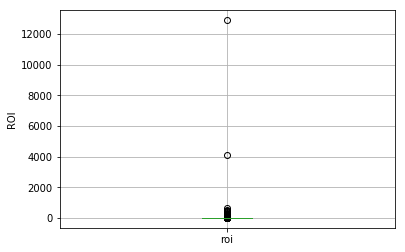

In [69]:
#ROI outliers
cleaned[['roi']].boxplot()
plt.ylabel('ROI')

#### The boxplot for ROI shows a number of outliers with high ROI values. These points are reflective of movies made on smaller budges that performed exceedingly well at the box-office (e.g. Paranormal Activity).

### Visualize any outliers in Revenue

Text(0, 0.5, 'Revenue')

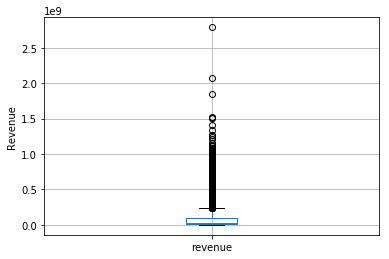

In [70]:
#Revenue outliers
cleaned[['revenue']].boxplot()
plt.ylabel('Revenue')

#### The boxplot for revenue shows a large number of outliers on the high end (greater than ~200 M USD). These refer to movies that are often categorized as blockbusters (e.g. Star Wars, Jurassic Park). Since movie revenues are increasing (see below), these movies will still be taken into account in the initial analysis.

### Visualize any outliers in budget

Text(0, 0.5, 'Budget')

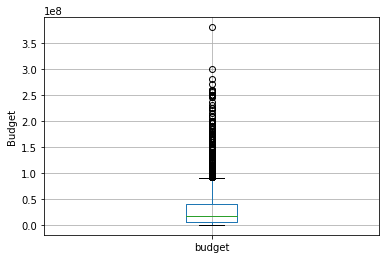

In [71]:
#Budget outliers
cleaned[['budget']].boxplot()
plt.ylabel('Budget')

#### The budget boxplot shows a large number of outliers with high budgets (greater than ~100M USD). With the budget of movies increasing (see below), these high-budget movies will also be included in the initial analysis.

### What does the relationship between budget and revenue look like?

Text(0.5, 0, 'Budget')

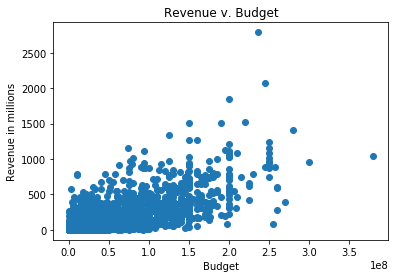

In [72]:
#Relationship between budget and revenue
plt.scatter(x=cleaned.budget,y=cleaned.revenue/1e6)
plt.ylabel('Revenue in millions')
plt.title('Revenue v. Budget')
plt.xlabel('Budget')

#### As expected, there appears to be a strong correlation between revenue and budget, with more scatter at higher budgets.

### Visualize the relationship between categorical success and budget

Text(0, 0.5, 'Average Budget in millions')

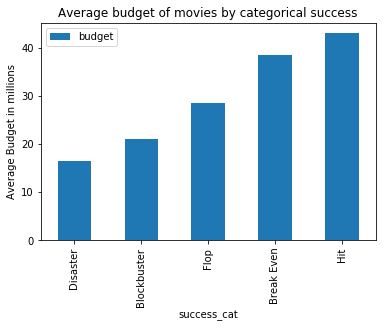

In [73]:
#Relationship between average budget and cat success
cleaned[['success_cat','budget']].groupby('success_cat').mean().apply(lambda x: x/1e6).sort_values('budget').plot(kind='bar')
plt.title('Average budget of movies by categorical success')
plt.ylabel('Average Budget in millions')


#### The budget is lowest for movies that are disasters or blockbusters (i.e. extremes). Having too low of a budget can affect the quality, reputation, and star power of a movie, thus resulting in lower revenue (disasters). On the other hand, having a lower budget can also allow the movie to recover their costs more easily and be categorized as a blockbuster (classified as movies that gross 5 times their budget). Whether a lower-budget movie is a disaster or blockbuster likely depends on other factors such as genre, star power, release season etc.

### What does the distribution of budgets look like?

Text(0.5, 1.0, 'Budget Distribution')

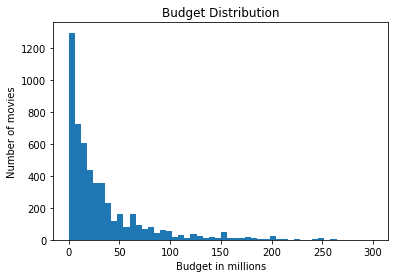

In [74]:
#Distribution of budgets
cleaned.budget.apply(lambda x: x/1e6).plot(kind='hist',bins=50,range=(0,300))
plt.xlabel('Budget in millions')
plt.ylabel('Number of movies')
plt.title('Budget Distribution')

#### The majority of movies have a budget of less than 50 million USD, with the largest budget group being less than 10 M USD.

### What does the distribution of revenue look like?

Text(0.5, 1.0, 'Revenue Distribution')

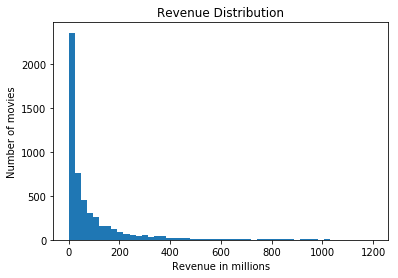

In [75]:
#Distribution of revenue
cleaned.revenue.apply(lambda x: x/1e6).plot(kind='hist',bins=50,range=(0,1200))
plt.xlabel('Revenue in millions')
plt.ylabel('Number of movies')
plt.title('Revenue Distribution')

#### Most movies have a revenue of less than 200 million USD with the majority grossing less than 50-100 million USD.

### What does the distribution of ROI look like?

Text(0.5, 1.0, 'ROI Distribution')

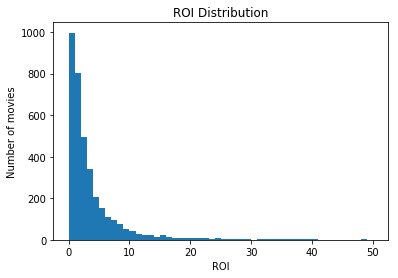

In [76]:
#Distribution of roi
cleaned.roi.plot(kind='hist',bins=50,range=(0,50))
plt.xlabel('ROI')
plt.ylabel('Number of movies')
plt.title('ROI Distribution')

#### The vast majority of movies have an ROI of less than 5

### What does the distribution of categorial success look like?

Text(0, 0.5, 'Number of Movies')

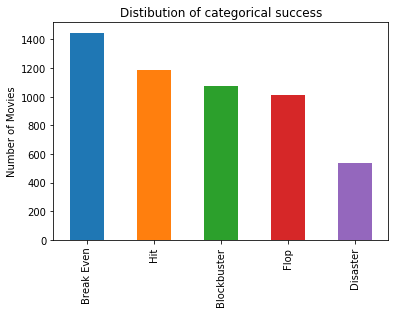

In [77]:
#Distribution of categorical success
cleaned.success_cat.value_counts().plot(kind='bar')
plt.title('Distibution of categorical success')
plt.ylabel('Number of Movies')

#### The largest category of movies manage to break-even, with hits, blockbusters, and flops having similar ratios. The smallest group of films are disasters.

### Which release season typically results in the highest movie revenues?

Text(0, 0.5, 'Average Revenue in millions')

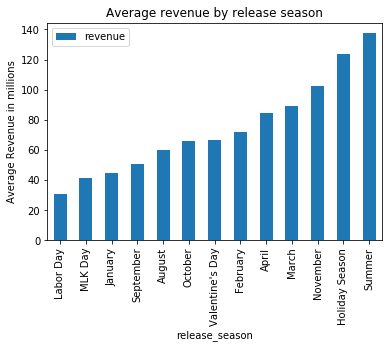

In [78]:
#Relationship between release_season and average revenue
cleaned[['release_season','revenue']].groupby('release_season').mean().apply(lambda x: x/1e6).sort_values('revenue').plot(kind='bar')
plt.title('Average revenue by release season')
plt.ylabel('Average Revenue in millions')

#### Movies released in the summer make the most money on average followed by the holiday season. Holidays like Labor Day and MLK Day don't appear to have much of an impact. Outside of the holidays and summer, movies that have grossed the highest are typically released in November, March and April.

### How has movie revenue changed over the years?

Text(0.5, 0, 'Year')

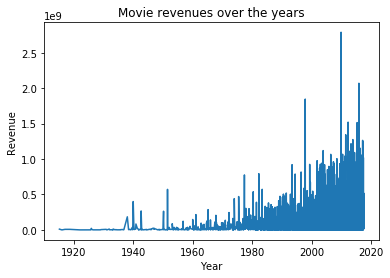

In [79]:
temp = cleaned[['release_date','revenue']].sort_values('release_date')
plt.plot(temp.release_date, temp.revenue)
plt.title('Movie revenues over the years')
plt.ylabel('Revenue')
plt.xlabel('Year')

#### Overall, movie revenues have been steadily increasing since the 1980s.

### How have movie budgets changed over the years?

Text(0.5, 0, 'Year')

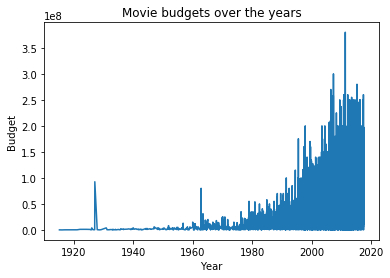

In [80]:
temp = cleaned[['release_date','budget']].sort_values('release_date')
plt.plot(temp.release_date, temp.budget)
plt.title('Movie budgets over the years')
plt.ylabel('Budget')
plt.xlabel('Year')

#### Movie revenues have increased dramatically over the past few decades.

### Is there a correlation between runtime and revenue?

Text(0.5, 0, 'Runtime (minutes)')

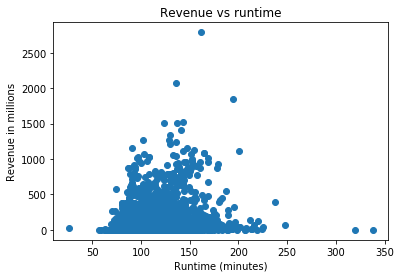

In [81]:
#Relationship between runtime and revenue
plt.scatter(x=cleaned.runtime,y=cleaned.revenue/1e6)
plt.title('Revenue vs runtime')
plt.ylabel('Revenue in millions')
plt.xlabel('Runtime (minutes)')

#### There does not appear to much of a correlation between runtime and revenue.

### Is there a correlation between runtime and ROI?

Text(0.5, 0, 'Runtime (minutes)')

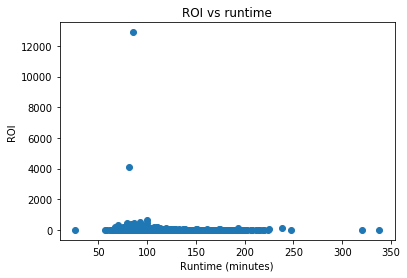

In [82]:
#Relationship between runtime and roi
plt.scatter(x=cleaned.runtime,y=cleaned.roi)
plt.title('ROI vs runtime')
plt.ylabel('ROI')
plt.xlabel('Runtime (minutes)')

#### It is difficult to assess the relationship with the outliers but there doesn't appear to be a correlation.

### Is there a relationship between the average vote rating on The Movie Database (TMDB) and revenue?

Text(0.5, 1.0, 'Revenue vs Vote Average')

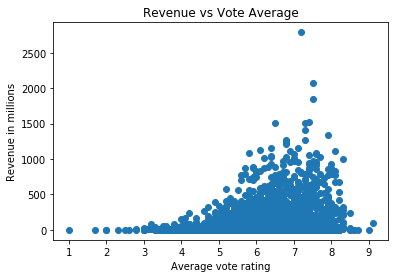

In [83]:
#Relationship between vote_average and revenue
plt.scatter(x=cleaned.vote_average,y=cleaned.revenue/1e6)
plt.ylabel('Revenue in millions')
plt.xlabel('Average vote rating')
plt.title('Revenue vs Vote Average')

####  Movie with a rating less than 5 seem to be associated with lower revenues. The majority of movies have a rating between 5 and 9 and but the relationship between revenue and rating is unclear in this region.

### Is there a relationship between the the number of votes on The Movie Database (TMDB) and revenue?

Text(0.5, 1.0, 'Revenue vs Vote Count')

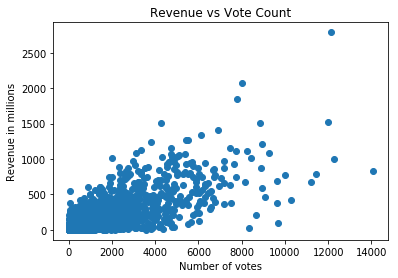

In [84]:
#Relationship between vote_count and revenue
plt.scatter(x=cleaned.vote_count,y=cleaned.revenue/1e6)
plt.ylabel('Revenue in millions')
plt.xlabel('Number of votes')
plt.title('Revenue vs Vote Count')

#### There seems to be a correlation with higher vote counts on TMDB typically being associated with higher revenue. However, there is significantly more scatter in vote counts greater than ~7000.

### Do movies that belong to a collection typically gross higher than movies that do not?

Text(0.5, 1.0, 'Revenue dependency on belonging to a collection')

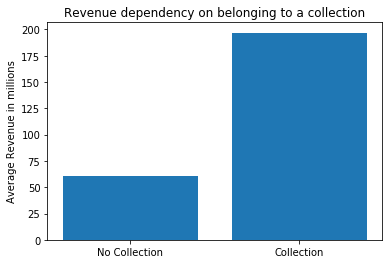

In [85]:
#Average revenue when belonging to a collection vs when not
no_collection = cleaned[cleaned.collection == 0].revenue.mean()
#Average revenue when belonging to a collection vs when not
collection = cleaned[cleaned.collection != 0].revenue.mean()

plt.bar(['No Collection', 'Collection'],[no_collection/1e6,collection/1e6],align='center')
plt.ylabel('Average Revenue in millions')
plt.title('Revenue dependency on belonging to a collection')

#### Movies that belong to a collection (i.e. franchise) gross, on average, almost 4 times higher than movies that do not belong to a collection.

### What are the top 10 collections with the highest total revenue?

Text(0, 0.5, 'Revenue in millions')

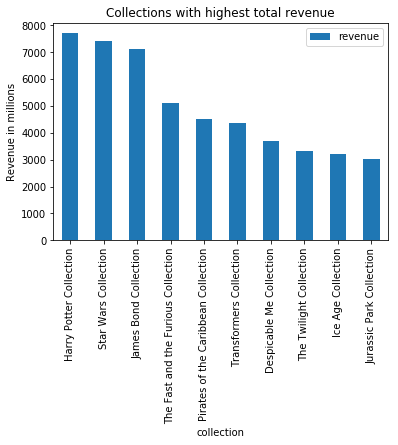

In [86]:
#Top 10 collections with highest collective revenue
cleaned[['collection','revenue']].groupby('collection').sum().apply(lambda x: x/1e6).sort_values('revenue'
                                                                          ,ascending=False).iloc[1:11].plot(kind='bar')
plt.title('Collections with highest total revenue')
plt.ylabel('Revenue in millions')


#### The Harry Potter, Star Wars, and James Bond collections have the highest total revenue.

### What are the top 10 collections with the highest average movie revenue?

Text(0.5, 1.0, 'Collections with highest average revenue per movie')

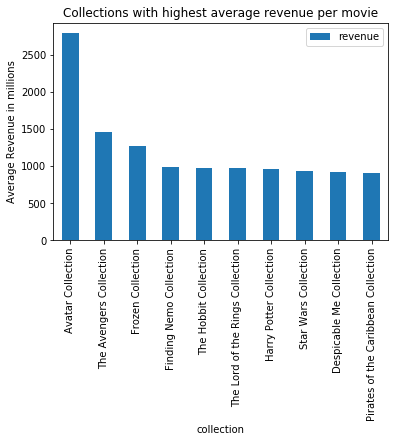

In [87]:
#Top 10 collections with highest average revenue per movie
cleaned[['collection','revenue']].groupby('collection').mean().apply(lambda x: x/1e6).sort_values('revenue'
                                                                          ,ascending=False).iloc[0:10].plot(kind='bar')
plt.ylabel('Average Revenue in millions')
plt.title('Collections with highest average revenue per movie')


#### The Avatar collection have the highest average movie revenue out of any other collection in this dataset. However, it should be noted that there is only one movie released in this collection (sequels are currently in the works).

### Does having a top actor as the lead have an impact on movie revenue and/or ROI?

Text(0, 0.5, 'Average Revenue in millions')

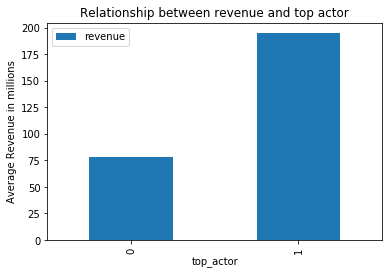

In [88]:
#Relationship between having a top actor and revenue
cleaned[['top_actor','revenue']].groupby('top_actor').mean().apply(lambda x: x/1e6).plot(kind='bar')
plt.title('Relationship between revenue and top actor')
plt.ylabel('Average Revenue in millions')

Text(0, 0.5, 'Average ROI')

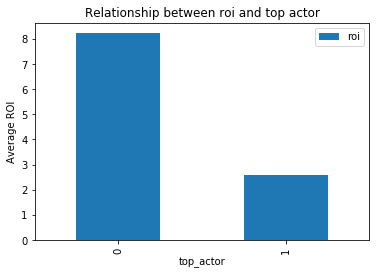

In [89]:
#Relationship between having a top actor and roi
cleaned[['top_actor','roi']].groupby('top_actor').mean().plot(kind='bar')
plt.title('Relationship between roi and top actor')
plt.ylabel('Average ROI')

#### A top actor is defined as any actor appearing on highest grossing actors list on IMDB. While having a top actor as a lead does result in a much higher revenue on average (~200M vs 50M USD), it also results in a lower ROI (~75% decrease), likely due to the higher compensation top actors demand.

### Does having a top director have an impact on movie revenue and/or ROI?

Text(0, 0.5, 'Average Revenue in millions')

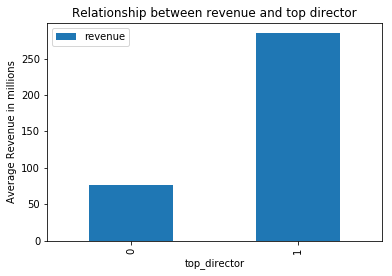

In [90]:
#Relationship between having a top director and revenue
cleaned[['top_director','revenue']].groupby('top_director').mean().apply(lambda x: x/1e6).plot(kind='bar')
plt.title('Relationship between revenue and top director')
plt.ylabel('Average Revenue in millions')

Text(0, 0.5, 'Average ROI')

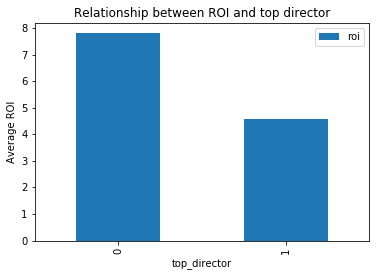

In [91]:
#Relationship between having a top director and roi
cleaned[['top_director','roi']].groupby('top_director').mean().plot(kind='bar')
plt.title('Relationship between ROI and top director')
plt.ylabel('Average ROI')

#### A top director is defined as any director appearing on highest grossing actors list on IMDB. Similar to hiring a top actor, a top director also results in a much higher average revenue (~280M vs 75M USD). However, while the ROI is lower with a top director, the difference appears to be less significant when compared to top actors (~50% decrease). This could indicate that hiring a top director can result in higher revenues on lower budgets (i.e. higher ROIs), compared to hiring a top actor.

### What are the 10 most common languages used in this dataset?

Text(0.5, 1.0, '10 Most Common Languages')

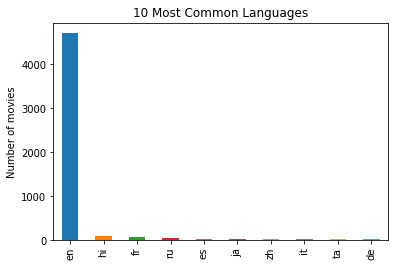

In [92]:
#Top 10 languages
cleaned['original_language'].value_counts().head(10).plot(kind='bar')
cleaned['original_language'].value_counts().head(10)
plt.ylabel('Number of movies')
plt.title('10 Most Common Languages')

#### The vast majority of movies in this dataset are made in English (n=4711) followed by Hindi (n=96) and French (n=86)

### What genres are associated with the highest revenues and budgets?

In [93]:
#Create temporary df with separate rows for each genre
temp = cleaned.genres.apply(pd.Series).stack().reset_index(level=1,drop=True).to_frame('temp_genre')
#Merge with 'cleaned' dataset to have a separate rows for each genre
temp = pd.merge(cleaned,temp,left_index=True,right_index=True)
#Group revenues and budgets by genre and calculate the average for each genre
x = temp[['temp_genre','revenue','budget','roi']].groupby('temp_genre').mean().head(10)

Text(0, 0.5, 'Average Revenue')

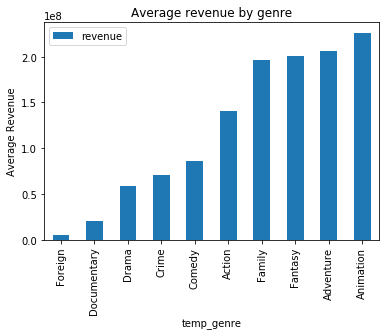

In [94]:
x[['revenue']].sort_values('revenue').plot(kind='bar')
plt.title('Average revenue by genre')
plt.ylabel('Average Revenue')

#### Animated movies have the highest average revenue followed closely by family, fantasy, and adventure. Foreign films, documentaries and dramas appear to have the lowest average revenues.

Text(0, 0.5, 'Average budget')

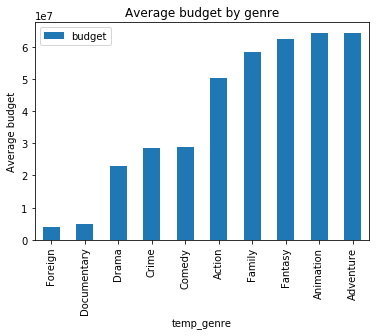

In [95]:
x[['budget']].sort_values('budget').plot(kind='bar')
plt.title('Average budget by genre')
plt.ylabel('Average budget')

#### Adventure and animated movies appear to have the highest budgets, followed closely by fantasy and family. Looking at the previous plot, it seems that movie genres with higher budgets typically result in higher revenues.

Text(0, 0.5, 'Average ROI')

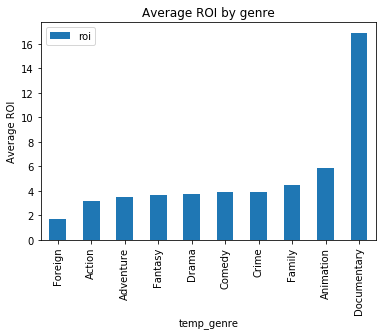

In [96]:
x[['roi']].sort_values('roi').plot(kind='bar')
plt.title('Average ROI by genre')
plt.ylabel('Average ROI')

#### Documentary films have the highest ROI by far, follwed by animated movies. Most other genres (except for foreign) result in similar ROIs on average.